[View in Colaboratory](https://colab.research.google.com/github/hisaponz/2_Perceptron/blob/master/3_scikit_learn.ipynb)

(8/10) scikit-learn

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris.data[:, [2, 3]]

y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


テストデータとトレーニングデータの分割
　・層化サンプリング：　train_test_split関数から返されるトレーニングサブセットとテストサブセットに含まれるクラスラベル比率が入力データセットと同じ



In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=1,
      shuffle=True, tol=None, verbose=0, warm_start=False)

正解率 = 1 - 誤分類率 (misclassified)


In [6]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [8]:
# 分類器に定義されている score メソッド
print('Accuracy: %.2f' % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  #print(x1_min, x1_max)
  #print(x2_min, x2_max)
  
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
  
  #print(xx1, xx2)
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  
  plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap=cmap)
  
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    
    # テストサンプルを目立たせる
    if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],
                 c='', 
                 edgecolor='black',
                 alpha=1.0,
                 linewidth=1,
                 marker='o',
                 s=100,
                 label='test set')

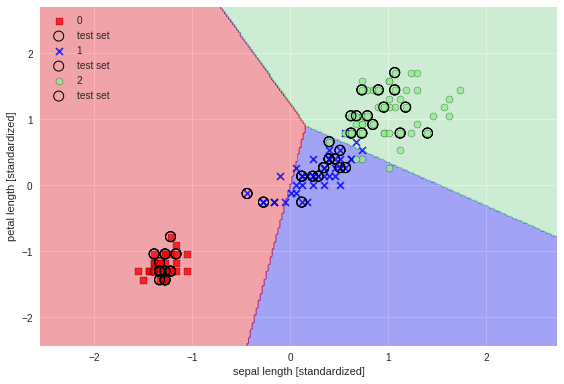

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

P.60　シグモイド関数

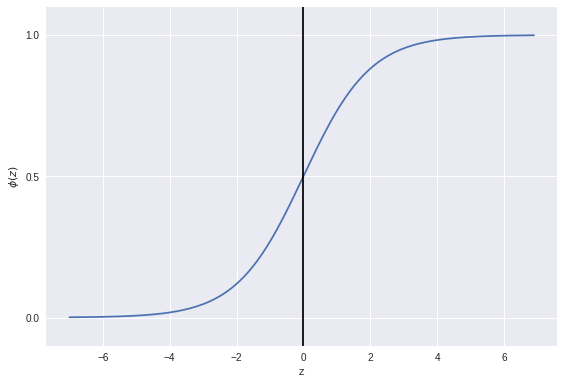

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
# 垂直線
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)

plt.xlabel('z')
plt.ylabel('$\phi (z)$')

plt.yticks([0.0, 0.5, 1.0])
# Axesクラスのオブジェクト取得
ax = plt.gca()
# 水平グリッド線を追加
ax.yaxis.grid(True)

# グラフのラベルが重ならないよう調整
plt.tight_layout()
plt.show()

(8/10) P.64, φ(z) の様々な値に対する1つのサンプルの分類コストを具体的に示すグラフをプロットする

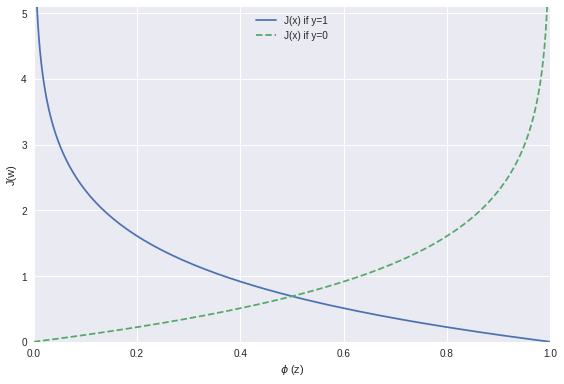

In [12]:
def cost_1(z):
  return - np.log(sigmoid(z))

def cost_0(z):
  return - np.log(1- sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label = 'J(x) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(x) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])

plt.xlabel('$\phi$ (z)')
plt.ylabel('J(w)')

plt.legend(loc='upper center')

# グラフのラベルが重ならないよう調整
plt.tight_layout()
plt.show()

(8/10) ADALINE実装をロジスティック回帰のアルゴリズムに変換する

In [0]:
class LogisticRegressionGD(object):
  
  # 0.01 -> 0.05, 10 -> 100
  def __init__(self, eta=0.05, n_iter=100, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []
    
    # _ -> i
    for i in range(self.n_iter):
      net_input = self.net_input(X)

      output = self.activation(net_input)
      errors = (y - output)

      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      
      # 誤差平均和のコストではなくロジスティック回帰のコストを計算する
      # cost = (errors**2).sum() / 2.0
      cost = -y.dot(np.log(output)) - ((1 - y)).dot(np.log(1 - output))
      
      self.cost_.append(cost)
    return self
      
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  
  # X -> z
  def activation(self, z):
    # return X
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
  
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)
    # return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

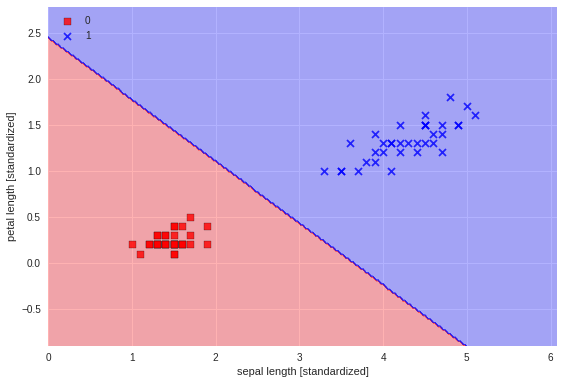

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
# ロジスティック回帰のインスタンスを作成
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
# モデルをトレーニングデータに適合させる
lrgd.fit(X_train_01_subset, y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                       y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

3つのクラスに分類

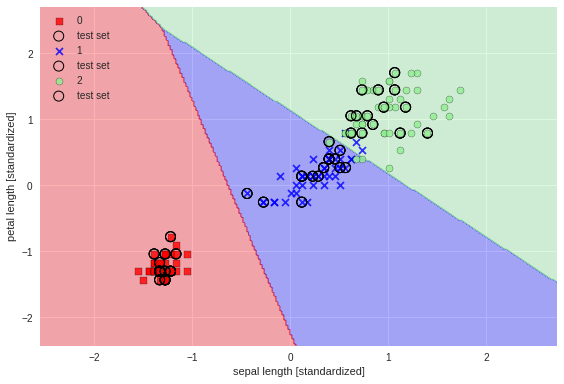

In [15]:
from sklearn.linear_model import LogisticRegression

# ロジスティック回帰のインスタンスを作成
lr = LogisticRegression(C=100.0, random_state=1)
# モデルをトレーニングデータに適合させる
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                       y_combined,
                      classifier=lr,
                     test_idx=range(105, 150))

plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')

plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [16]:
# トレーニングサンプルが特定のクラスに属する確率
lr.predict_proba(X_test_std[:3,:])

array([[3.20136878e-08, 1.46953648e-01, 8.53046320e-01],
       [8.34428069e-01, 1.65571931e-01, 4.57896429e-12],
       [8.49182775e-01, 1.50817225e-01, 4.65678779e-13]])

In [17]:
# 確率の和は１になる
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

array([1., 1., 1.])

In [18]:
# クラスラベルの予測値取得のため各行の最大値を取得する
lr.predict_proba(X_test_std[:3,:]).argmax(axis=1)

array([2, 0, 0])

In [19]:
# 直接クラスラベルを取得
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [20]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

逆正則化パラメータCに基づくロジスティック回帰モデルをトレーニングデータに適合させている

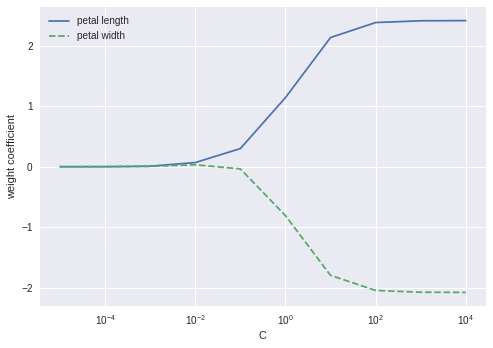

In [21]:
weights, params = [], []

# 10個の逆正則化パラメータに対応するロジスティック回帰モデルをそれぞれ処理
for c in np.arange(-5, 5):
  lr = LogisticRegression(C=10.**c, random_state=1)
  lr.fit(X_train_std, y_train)
  
  weights.append(lr.coef_[1])
  params.append(10.**c)

  # Numpy配列に変換
weights = np.array(weights)

plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
# 逆正則化パラメータ
plt.ylabel('weight coefficient')
# 重み係数
plt.xlabel('C')
plt.legend(loc='upper left')
# 横軸を対数スケール
plt.xscale('log')
plt.show()



(8/17) SVM

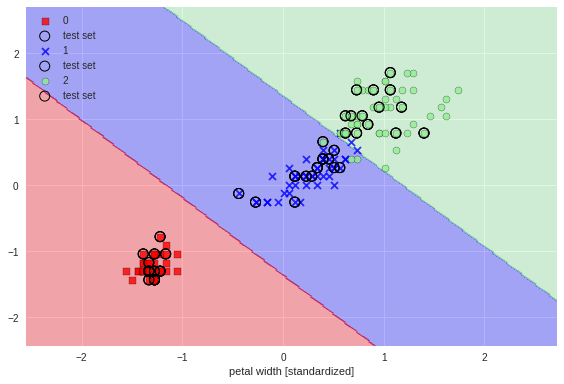

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

カーネルSVM

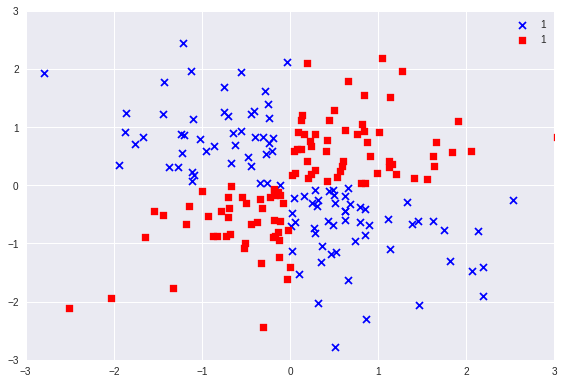

In [23]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)

# 標準正規分布に従う乱数で 200行 2列の行列を生成
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')

plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

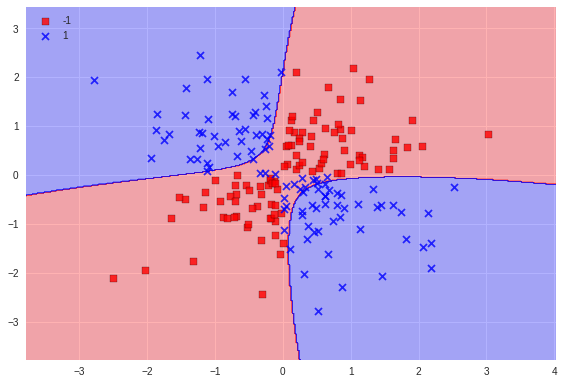

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

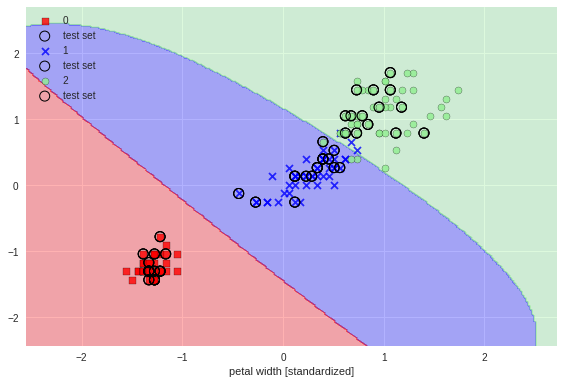

In [25]:
# gamma と C のパラメータを変更
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

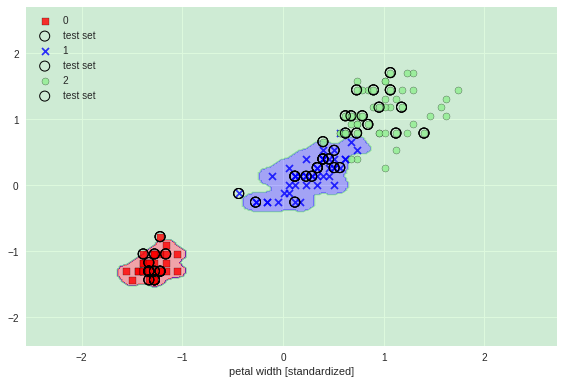

In [26]:
# gamma のパラメータを変更
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

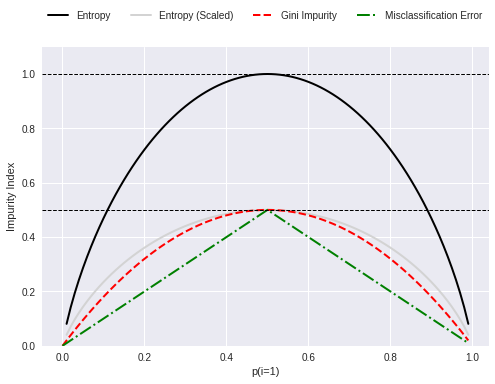

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1 - p))
  
def entropy(p):
  return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
  return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (Scaled)', 'Gini Impurity', 'Misclassification Error'], ['-', '-', '--', '-.'], ['black', 'lightgray', 'red', 'green', 'cyan']): 
   line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
                                                                                                         
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
                                                                                                         
plt.ylim([0, 1.1])                                                                                                         
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

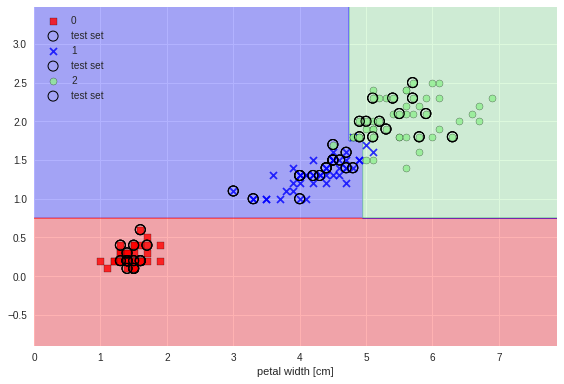

In [28]:
from sklearn.tree import DecisionTreeClassifier

# エントロピーを指標とする決定木のインスタンスを生成
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(104, 150))

plt.xlabel('petal length [cm]')
plt.xlabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [29]:
!pip3 install pydotplus

    100% |████████████████████████████████| 286kB 5.2MB/s 
  Running setup.py bdist_wheel for pydotplus ... - done
  Stored in directory: /content/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [30]:
!pip3 install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgraphite2-3 libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 28 newly installed, 0 to remove and 0 not upgraded.
Need to get 4,122 kB of archives.
After this operation, 2

In [31]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree, 
                           filled=True, 
                           rounded=True, 
                           class_names=['Setosa', 'Versicolor', 'Virginica'], 
                           feature_names=['petal length', 'petal witdh'],
                           out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

True

ランダムフォレスト

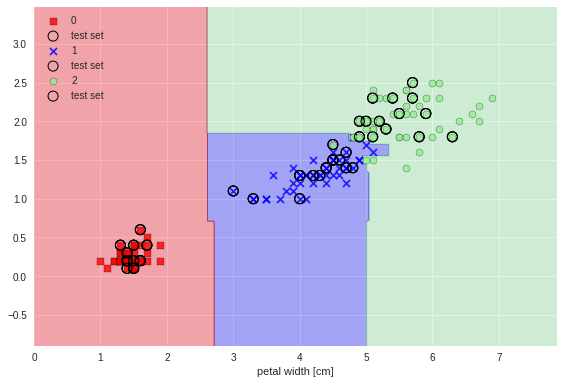

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25,
                                random_state=1,
                                n_jobs=2)

# トレーニングデータにランダムフォレストのモデルを適合させる
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.xlabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

k近傍法

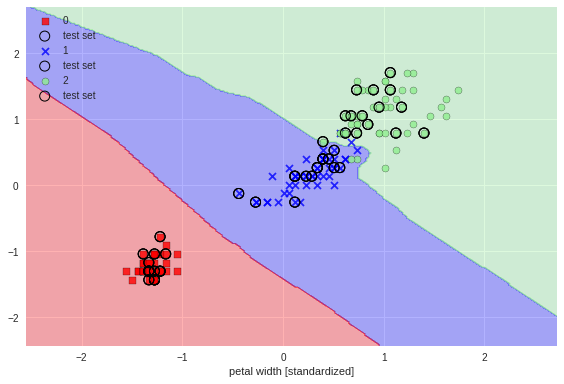

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.xlabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()